# Problem set 1: Printing and plotting

**Learning goals**:

- Printing to screen, `print`
- Write to and read from text files, `.write` and `.read`
- Plot 2D figures using `.plot` in  `matplotlib`
- Plot 3D figures using `.plot_surface` in `matplotlib` with `np.meshgrid` and `projection='3d'`

**Table of contents**<a id='toc0_'></a>    
- 1. [Define function](#toc1_)    
- 2. [Print to screen (table)](#toc2_)    
- 3. [Write the output to `table_output.txt`](#toc3_)    
- 4. [Read `table_output.txt` and print content to screen](#toc4_)    
- 5. [2D plot indifference curves](#toc5_)    
- 6. [3D plot of utility function](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports you will need:

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from matplotlib import cm # for colormap

# predefine options for all plots
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'-'})
plt.rcParams.update({'font.size': 14})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

**Note:** Answers are in A*.py files.

## 1. <a id='toc1_'></a>[Define function](#toc0_)

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

where `x1` and `x2` are *positional arguments*, and `alpha`and `beta` are *keyword arguments* with default arguments $\alpha=0.5$ and $\beta=1$.

In [11]:
def utility(x1, x2, alpha=0.5, beta=1):
    """
    Utility function for two goods.
    
    Parameters:
    x1 : float or np.array
        Quantity of good 1.
    x2 : float or np.array
        Quantity of good 2.
    kwargs : dict
        Additional keyword arguments for utility function parameters.
        
    Returns:
    float or np.array
        Utility value(s).
    """      
    
    return ((alpha*(x1**-beta)) + (1-alpha)*(x2**-beta))**(-1/beta)

## 2. <a id='toc2_'></a>[Print to screen (table)](#toc0_)

In [12]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `gen_table(x1_vec,x2_vec,u_func)` to print values of `u(x1,x2)` in the table form shown below.

In [13]:
# update this code

def gen_table(x1_vec,x2_vec):
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}'
    for j, x2 in enumerate(x2_vec):
       text += f'{j:6d}' 
    text += '\n' # line shift
    
    # c. body
    for i, x1 in enumerate(x1_vec):
        text += f'{i:3d}' # row header
        for j, x2 in enumerate(x2_vec):
            u = utility(x1,x2)
            text += f'{u:6.2f}'
        text += '\n' # line shift
    
    # d. print
    return text

table = gen_table(x1_vec,x2_vec)
print(table)

        0     1     2     3     4
  0  1.05  1.16  1.44  1.48  1.57
  1  1.16  1.30  1.66  1.71  1.83
  2  1.44  1.66  2.30  2.40  2.64
  3  1.48  1.71  2.40  2.50  2.77
  4  1.57  1.83  2.64  2.77  3.10



In [14]:
from A1 import u_func as u_func_answer
from A2 import gen_table as gen_table_answer
print(gen_table_answer(x1_vec,x2_vec,u_func_answer))

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641
  3  1.479 1.711 2.396 2.500 2.768
  4  1.569 1.832 2.641 2.768 3.100


## 3. <a id='toc3_'></a>[Write the output to `table_output.txt`](#toc0_)

In [15]:
with open('table_output.txt', 'w') as f:
    f.write(table)

## 4. <a id='toc4_'></a>[Read `table_output.txt` and print content to screen](#toc0_)

In [16]:
with open('table_output.txt', 'r') as f:
    content = f.read()

print(content)

        0     1     2     3     4
  0  1.05  1.16  1.44  1.48  1.57
  1  1.16  1.30  1.66  1.71  1.83
  2  1.44  1.66  2.30  2.40  2.64
  3  1.48  1.71  2.40  2.50  2.77
  4  1.57  1.83  2.64  2.77  3.10



## 5. <a id='toc5_'></a>[2D plot indifference curves](#toc0_)

The formula for the indifference curves of $u(x_1,x_2)$ is:

$$
x_2(x_1, u) = \left( \frac{u^{-\beta} - \alpha x_1^{-\beta}}{1-\alpha} \right)^{-1/\beta}
$$

for 

$$
\log(x_1) > \log(u) + \log(\alpha)/\beta
$$

Produce a figure like the one below and save to disc.

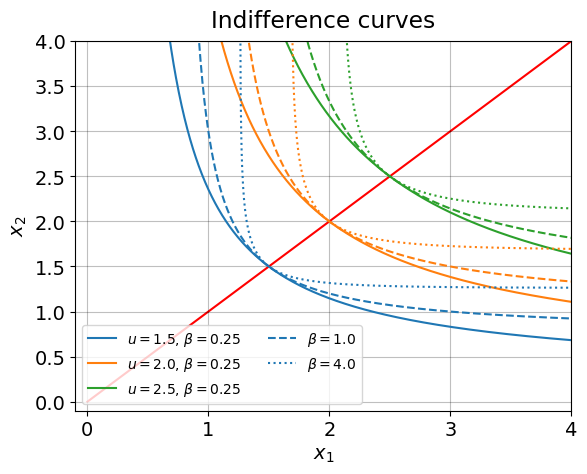

In [17]:
alpha = 0.5 
betas = [0.25, 1.0, 4.0]
uvals = [1.5, 2.0, 2.5] # values of u

def x2_func(x1, u, alpha=0.5, beta=1.0):
    return ((u**-beta - alpha*(x1**-beta))/(1-alpha))**(-1/beta)

def plot(alpha, betas, uvals):
    x1_vec = np.linspace(0.1, 4.0, 1000)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ls = ['-', '--', ':']
    for i, beta in enumerate(betas):
        for j, uval in enumerate(uvals):
            I = np.log(x1_vec) > np.log(uval) + np.log(alpha)/beta
            x2_vals = x2_func(x1_vec[I], uval, alpha=alpha, beta=beta)
            if i == 0:
                label = fr'$u = {uval}$, $\beta = {beta}$'
            elif j == 0:
                label = fr'$\beta = {beta}$'
            else:
                label = ''
            ax.plot(x1_vec[I], x2_vals, ls=ls[i], color=colors[j], label=label)
    ax.plot([0,4], [0,4], color='red', zorder=0)
    ax.set_title('Indifference curves', pad=10)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xlim(-0.1,4)
    ax.set_ylim(-0.1,4)
    ax.legend(ncol=2, loc='lower left', prop={'size': 10})
    plt.show()
    fig.savefig('indifference_curves.png', dpi=300)

plot(alpha, betas, uvals)


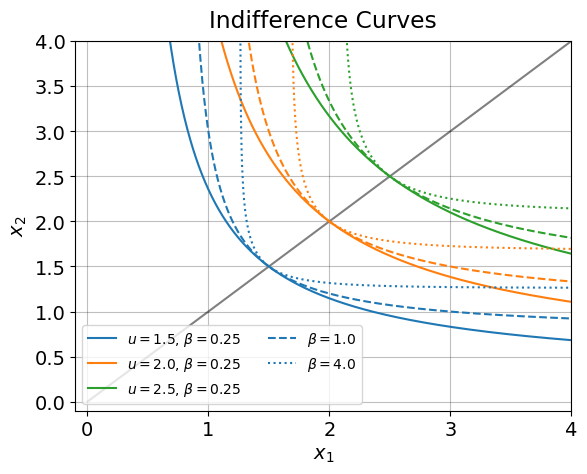

In [18]:
import A5
A5.plot(alpha,betas,uvals)

**Hint:** To check your implementation of `x2(x1,u,alpha,beta)` you can use the code below.

In [19]:
x1_ = 2.0
x2_ = 1.5
u_ = utility(x1_,x2_,alpha=alpha,beta=betas[0])
x2_implied = x2_func(x1_,u_,alpha=alpha,beta=betas[0])
assert np.isclose(x2_,x2_implied)

## 6. <a id='toc6_'></a>[3D plot of utility function](#toc0_)

Reproduce the figures below of $u(x_1,x_2)$ using:

1. the `meshgrid` function from *numpy* 
1. the `.plot_surface` and `.plot` axis methods from *matplotlib*.

where the black lines are indifference curves for $u \in \{1,2,3\}$.

**Hint:** You can look at the documentation.

In [ ]:
?np.meshgrid


Signature:       np.meshgrid(*xi, copy=True, sparse=False, indexing='xy')
Call signature:  np.meshgrid(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function meshgrid at 0x1064f0220>
File:            /opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py
Docstring:      
Return a tuple of coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of
N-D scalar/vector fields over N-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.

.. versionchanged:: 1.9
   1-D and 0-D cases are allowed.

Parameters
----------
x1, x2,..., xn : array_like
    1-D arrays representing the coordinates of a grid.
indexing : {'xy', 'ij'}, optional
    Cartesian ('xy', default) or matrix ('ij') indexing of output.
    See Notes for more details.

    .. versionadded:: 1.7.0
sparse : bool, optional
    If True the shape of the returned coordinate array for dimension *i*
    is reduced from ``(N1, ..., N

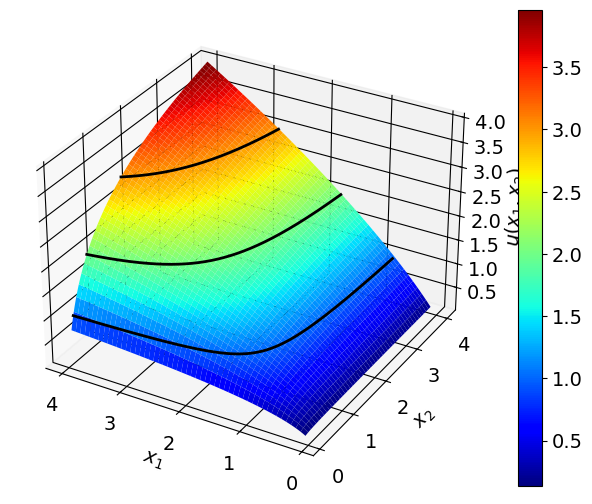

In [30]:
# these values were used
alpha = 0.75
beta = 0.5
x1_vec = np.linspace(0.1,4,1000)
x2_vec = np.linspace(0.1,4,1000)
uvals = [1.0,2.0,3.0]

# write your code here
def plot(x1_vec, x2_vec, alpha, beta, uvals):
    # a. calculate grids
    x1_grid, x2_grid = np.meshgrid(x1_vec, x2_vec, indexing='ij')
    u_grid = utility(x1_grid, x2_grid, alpha=alpha, beta=beta)

    # b. plot surface
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    h = ax.plot_surface(x1_grid, x2_grid, u_grid, cmap=cm.jet)
    fig.colorbar(h)

    # c. plot indifference curves
    for u in uvals:
        I = np.log(x1_vec) > np.log(u) + np.log(alpha) / beta
        x1_curve = x1_vec[I]
        x2_curve = x2_func(x1_curve, u, alpha=alpha, beta=beta)
        J = x2_curve < x2_vec[-1]
        u_curve = u * np.ones_like(x2_curve[J])
        ax.plot(x1_curve[J], x2_curve[J], u_curve, lw=2, color='black', zorder=99)

    # d. labels and layout
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$u(x_1, x_2)$')
    ax.invert_xaxis()
    fig.tight_layout(pad=0.1)
    plt.show()
# x1_grid,x2_grid = 
# u_grid = 

plot(x1_vec,x2_vec,alpha,beta,uvals)

In [ ]:
import A6
A6.plot(x1_vec,x2_vec,alpha,beta,uvals)